In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.segments import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# This move should have an acelleration, then a constant velocity across the three semgments, then decel. It should 
# not have a sawtooth or undulating pattern. 

sl = SegmentList([Joint(5_000, 500_000)])

x = 5000

sl.rmove([x])
sl.rmove([x])
sl.rmove([x])

for e in sl.segments:
    print(e.t, e)
    
#plot_segment_list(sl.dataframe)

1.01 |0.0100 0.9900 0.0100|[5000    50   :   4925@4975   :  25     4988]
1.01 |0.0100 0.9900 0.0100|[4988    50   :   4925@4975   :  25        0]


In [23]:
sl.dataframe

,axis,x,v_i,v_f,ss,del_t,n,cn,t
0,0,25.0,0.00,4999.61,a,0.01,0,55382,0.01
1,0,4950.0,4999.61,4999.61,c,0.99,0,409631,1.00
2,0,25.0,4999.61,4999.81,d,0.01,125,409631,1.01
3,0,50.0,4999.81,4975.25,a,0.01,-1,409615,1.02
4,0,4925.0,4975.25,4975.25,c,0.99,0,411637,2.01
5,0,25.0,4975.25,4987.62,d,0.01,2,411637,2.02
6,0,50.0,4987.62,4975.25,a,0.01,-2,410616,2.03
7,0,4925.0,4975.25,4975.25,c,0.99,0,411637,3.02
8,0,25.0,4975.25,0.00,d,0.01,0,411637,3.03


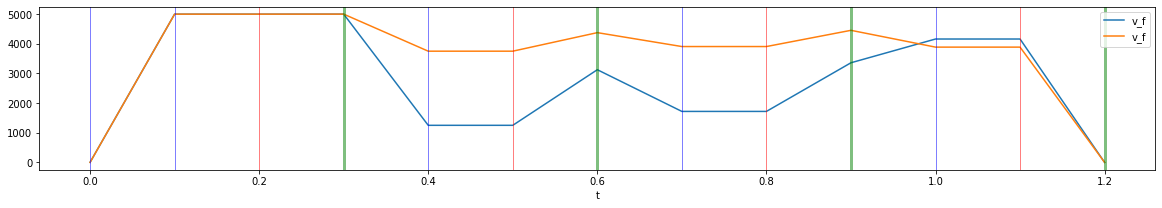

In [24]:
sl = SegmentList([Joint(5000, 50_000, 50_000), Joint(5000, 50_000)])
sl.rmove([1000, 1000])
sl.rmove([500, 1000])
sl.rmove([500, 1000])
sl.rmove([1000, 1000])

plot_segment_list(sl.dataframe)

In [25]:
for e in sl.all_segments:
    print(e.joint_segments)
    

[[0       250  :    500@4998   :  250    4999], [0       250  :    500@4998   :  250    4999]]
[[4999    312  :    125@1250   :  62     3125], [4999    437  :    375@3750   :  188    4375]]
[[3125    242  :    172@1719   :  86     3359], [4375    414  :    391@3906   :  195    4453]]
[[3359    376  :    416@4160   :  208       0], [4453    417  :    389@3887   :  194       0]]


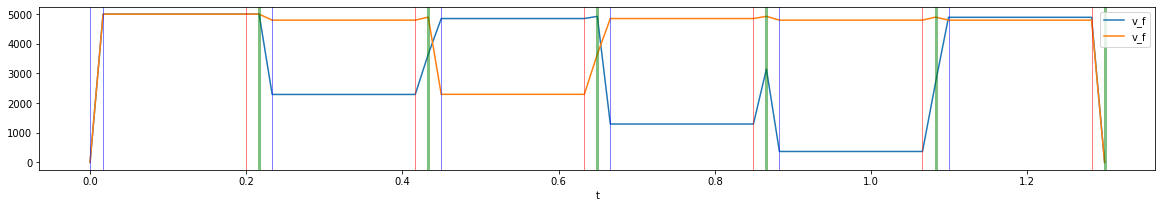

In [6]:
# Much faster accelerations than the last chart. 
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.rmove([1000, 1000])
sl.rmove([500, 1000])
sl.rmove([1000, 500])
sl.rmove([300, 1000])
sl.rmove([100, 1000])
sl.rmove([1000, 1000])

#sl.update()
plot_segment_list(sl.dataframe)

In [ ]:
sl = SegmentList([Joint(5000, 300_000, 300_000),Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([1000,1000])
sl.add_distance_segment([500,1000])
sl.add_distance_segment([1000,1000])
sl.add_distance_segment([-1000,1000])
sl.add_distance_segment([-1000,-1000])
sl.add_distance_segment([1000,1000])

plot_segment_list(sl.dataframe)
print(str(sl))

In [ ]:
sl.dataframe.head()

In [ ]:
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([18000, 20000])
sl.add_distance_segment([-100, 5000])
sl.add_distance_segment([100, 10000])
sl.add_distance_segment([-2500, 1000])
sl.add_distance_segment([100, 1000]) ## ERROR! This velocity should not be negative
sl.add_distance_segment([1000, 1000]) ## ERROR! This velocity should not be negative

df = sl.dataframe

plot_segment_list(sl.dataframe)
df[df.ss != 'c'].del_t.unique()

In [ ]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.add_distance_segment([1000, 500])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([2000, 1000])
sl.add_distance_segment([-100, 500])
sl.add_distance_segment([100, 1000])
sl.add_distance_segment([-2500, 1000])
sl.add_distance_segment([100, 1000]) 
sl.add_position_segment([0, 0]) 
sl.add_distance_segment([1000, 1000]) ## ERROR! This velocity should not be negative


plot_segment_list(sl.dataframe)

sl.validate()
print(sl.positions)

In [ ]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([1000, 0])
sl.add_distance_segment([0, 1000])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)
    
#sl.validate()
print(sl.positions)

In [ ]:
sl = SegmentList([Joint(33333, 66666)])
x = 5000
sl.add_distance_segment([x])
sl.add_distance_segment([x])
sl.add_distance_segment([-x])
sl.add_distance_segment([-x])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)

#sl.validate()
print(sl.positions)

In [ ]:
14.908532541958522+85.55207900072237

In [ ]:
sl = SegmentList([Joint(10000, 3000_000, 3000_000), Joint(10000, 3000_000, 3000_000)])

sl.add_distance_segment([5.0,-100.0])
sl.add_distance_segment([5.0,-100.0])
sl.add_distance_segment([-5.0,-100.0])
print(sl)
#sl.update(validate = False)



In [ ]:
10000 / 2500

In [ ]:
import numpy as np

sl = SegmentList([Joint(15000, 30_000, 30_000), Joint(15000, 30_000, 30_000)])

p = []
lx, ly = None,None
for a in np.linspace(0,2*np.pi, 25):
    x = np.sin(a)*1000000
    y = np.cos(a)*1000000
    
    
    if lx is None:
        lx, ly = x,y
        
    
    #print(f"sl.add_distance_segment([{x-lx},{y-ly}], validate=False)")
    p.append((x,y))
    sl.add_position_segment([x,y])
    lx, ly = x,y
    
df = pd.DataFrame(p, columns=['x','y'])
df.plot.scatter(x='x', y='y', figsize=(4,4))


#print(sl)
plot_segment_list(sl.dataframe)

In [ ]:
print(sl)

In [ ]:
# Get the points from the subsegments. 
def generate_points(sl):
    t = 0
    x = 0
    y = 0

    for e in sl.sub_segments:
        yield(t, x, y)
        t += e[0].t
        x += e[0].x
        y += e[1].x
l = list(generate_points(sl))

df = pd.DataFrame(l, columns = 't x y'.split()).set_index('t')
df.plot(figsize=(12,6))
df.plot.scatter(x='x', y='y', marker='.',figsize = (8, 8))

In [ ]:
def sim_df(axis, sl):
    simsegs = []
    slsegs = []
    
    for e in sl.sub_segments:
        s = e[axis]

        t, x, v0, v1 = s.t, s.x, s.v_i, s.v_f
        a = float(v1-v0)/float(t)
        if abs(round(x)) !=0:
            slsegs.append([t, x, v0, v1, a])

            simsegs += list(tj.SimSegment(v0,v1,x=x,t=t))
        
    sl_df = pd.DataFrame(slsegs, columns="t x v0 v1 a".split())
        
    df = pd.DataFrame(simsegs,columns=tj.SimSegment.row_header)
    df['tc'] = df.cn.cumsum()
    df['xn'] = df.dir.cumsum()
    df['delay'] = 1 / df.cn
        
    return sl_df, df

def plot2d(df_0, df_1):
    s = pd.DataFrame({'tc':np.linspace(df_0.tc.min(),df_0.tc.max(), 50000)})
    dfx = pd.concat([df_0[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'x'})
    dfy = pd.concat([df_1[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'y'})

    df = dfx.join(dfy)
    
    df.plot.scatter(x='x', y='y', marker='.', figsize = (8, 8))


sl_df_0, df_0 = sim_df(0,sl)

sl_df_1, df_1 = sim_df(1,sl)

ax = df_0.plot(x='tc', y='xn', figsize = (20, 8) )
ax = df_1.plot(ax=ax,x='tc', y='xn')

plot2d(df_0, df_1)